###CAO Points Analysis

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# For downloading.
import urllib.request as urlrq

#for plotting
import matplotlib.pyplot as plt


In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

### 2021 Points
http://www.cao.ie/index.php?page=points&p=2021

In [3]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Have a quick peek. 200 means OK.
resp

<Response [200]>

# Save the original data set 

In [4]:
# Create a file path for the original data.
pathhtml = 'data/cao2021_' + nowstr + '.html'


In [5]:
# The server uses the wrong encoding, fix it.
original_encoding = resp.encoding

# Change to cp1252.
resp.encoding = 'cp1252'

In [6]:
# Save the original html file.
with open(pathhtml, 'w') as f:
    f.write(resp.text)

In [7]:
# Compile the regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

In [8]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [10]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [11]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


### 2020 Points
https://www.cao.ie/index.php?page=points&p=2020

In [12]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [13]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [14]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20211203_223408.xlsx',
 <http.client.HTTPMessage at 0x2f604337790>)

In [15]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel(url2020, skiprows=10)

In [16]:
df2020


,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Spot check a random row.
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [18]:
# Spot check the last row.
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [19]:
# Create a file path for the pandas data.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [20]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

<br>

# CAO 2019 POINTS

***

http://www2.cao.ie/points/lvl8_19.pdf

### Steps to reproduce

- Download original pdf file.
- Open original pdf file in microsoft word.
- Save Mircosoft Word's converted pdf in the docx format.
- Resave word document for editing.
- Delete headers and footers.
- Delete preample in page 1.
- Select all and copy to notepad++.
- Delete blank lines and remove HEI headings and paste onto each course line respectively (using alt + scroll down).
- Insert double quotes along the HEI title as this will make it easier to edit using regular expressions. 
- Change backtick's to apostrophes.
- Go to repleace all with \t (tab delimiter) and replace with comma(,) as it is a CSV file.
- Many commas throughout the document so we couldn't load the dataframe as a csv file. Instead we went back to original format with the delimiter as the tab.
- When reading data in the sep = '\t' was used as the delimiter for separating the columns.
- Errors occured while laoding this data because unknowningly there were some double tabs on the document. Fix was to replace \t\t with \t. DF was able to be read in after this.
- I went back to the dataset and then replaced all ` back ticks ` with the correct ' forward tick mark.

In [21]:
df2019 = pd.read_csv('data/cao2019_20211129_edited.csv', sep = '\t')

In [22]:
df2019

,HEI,Course Code,INSTITUTION and COURSE,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
2,Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
4,Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...,...
927,Waterford Institute of Technology,WD200,Arts (options),221,296.0
928,Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
929,Waterford Institute of Technology,WD211,Creative Computing,275,322.0
930,Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


#  Concat and Join the Points

In [23]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [24]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [25]:
courses2019 = df2019[['Course Code','INSTITUTION and COURSE']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
927,WD200,Arts (options)
928,WD210,Software Systems Development
929,WD211,Creative Computing
930,WD212,Recreation and Sport Management


In [26]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3340,WD200,Arts (options)
3341,WD210,Software Systems Development
3342,WD211,Creative Computing
3343,WD212,Recreation and Sport Management


In [27]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
3344,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education
948,WD232,Business Information Systems
2612,NaN,NaN


In [28]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3340,WD200,Arts (options)
3341,WD210,Software Systems Development
3342,WD211,Creative Computing
3343,WD212,Recreation and Sport Management


In [29]:
# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3283,TL801,Animation Visual Effects and Motion Design
3284,TL802,"TV, Radio and New Media"
3285,TL803,Music Technology
3288,TL812,Computing with Digital Media


In [30]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3340,WD200,Arts (options)
3341,WD210,Software Systems Development
3342,WD211,Creative Computing
3343,WD212,Recreation and Sport Management


In [31]:
# Returns a copy of the data frame with duplciates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [32]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [33]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [34]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [35]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [36]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [37]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [38]:
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
927,WD200,221
928,WD210,271
929,WD211,275
930,WD212,274


In [39]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [40]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat
...,...,...,...,...
WD230,Mechanical and Manufacturing Engineering,230,253,273
WD231,Early Childhood Care and Education,266,NaN,NaN
WD232,Business Information Systems,261,NaN,NaN


In [41]:
pd.set_option("display.max_columns", None)
allcourses.describe()

,title,points_r1_2021,points_r1_2020,points_r1_2019
count,1651,928,1437,926
unique,1032,377,389,357
top,Business,300,300,300
freq,32,18,26,32


In [42]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1653 entries, AC120 to nan
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1651 non-null   object
 1   points_r1_2021  928 non-null    object
 2   points_r1_2020  1437 non-null   object
 3   points_r1_2019  926 non-null    object
dtypes: object(4)
memory usage: 64.6+ KB


In [43]:
allcourses. iloc[200:300]

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CR061,Electronic Engineering,NaN,260,NaN
CR062,Electrical Engineering,NaN,300,NaN
CR071,Mechanical Engineering,NaN,261,NaN
CR075,Biomedical Engineering,NaN,306,NaN
CR090,Architectural Technology,NaN,266,NaN
...,...,...,...,...
CW237,Computing in Interactive Digital Art and Design,NaN,212,NaN
CW238,Software Development,295,297,300
CW248,Information Technology Management,293,285,307


In [44]:
df2021.iloc[200]


title             Applied Social Care
points_r1_2021                    254
points_r2_2021                    219
Name: DB527, dtype: object

In [45]:
# I want to drop all the NaN Values as I can't compare these courses correctly over the years 
#https://sparkbyexamples.com/pandas/pandas-drop-rows-with-nan-values-in-dataframe/#:~:text=Alternatively%2C%20you%20can%20also%20use%20axis%3D0%20as%20a,you%20can%20do%20so%20using%20reset_index%20%28%29%20method.
allcourses1=allcourses.dropna()

In [46]:
allcourses2=allcourses1.replace('#','', regex=True)
#df = df.replace('old character','new character', regex=True)
#https://datatofish.com/replace-character-pandas-dataframe/
#https://pythonexamples.org/pandas-dataframe-select-columns-of-numeric-datatype/

In [47]:
allcourses2

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,First Year Art and Design (Common Entry portfo...,554,+matric,+mat
AD102,Graphic Design and Moving Image Design (portfo...,538,+matric,+mat
AD103,Textile and Surface Design and Jewellery and O...,505,+matric,+mat
...,...,...,...,...
WD200,Arts (options),201,AQA,221
WD210,Software Systems Development,260,279,271
WD211,Creative Computing,270,271,275


In [48]:
allcourses2.tail()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
WD200,Arts (options),201,AQA,221
WD210,Software Systems Development,260,279,271
WD211,Creative Computing,270,271,275
WD212,Recreation and Sport Management,262,270,274
WD230,Mechanical and Manufacturing Engineering,230,253,273


In [49]:
allcourses3=allcourses2.replace('AQA','', regex=True)


In [50]:
allcourses3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,First Year Art and Design (Common Entry portfo...,554,+matric,+mat
AD102,Graphic Design and Moving Image Design (portfo...,538,+matric,+mat
AD103,Textile and Surface Design and Jewellery and O...,505,+matric,+mat
...,...,...,...,...
WD200,Arts (options),201,,221
WD210,Software Systems Development,260,279,271
WD211,Creative Computing,270,271,275


In [51]:
allcourses3.tail()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
WD200,Arts (options),201,,221
WD210,Software Systems Development,260,279,271
WD211,Creative Computing,270,271,275
WD212,Recreation and Sport Management,262,270,274
WD230,Mechanical and Manufacturing Engineering,230,253,273


In [52]:
result = allcourses3.select_dtypes(include='number')
print(result)

Empty DataFrame
Columns: []
Index: [AC120, AC137, AD101, AD102, AD103, AD202, AD204, AD211, AD212, AD215, AD217, AD222, AL801, AL802, AL803, AL805, AL810, AL820, AL830, AL832, AL836, AL837, AL838, AL839, AL840, AL841, AL842, AL843, AL850, AL851, AL852, AL855, AL857, AL860, AL861, AL863, AL864, AL870, AS001, AS002, AS003, AS051, AS054, AS110, AS130, CK101, CK102, CK104, CK105, CK107, CK108, CK109, CK110, CK111, CK112, CK113, CK118, CK120, CK121, CK122, CK201, CK202, CK203, CK204, CK205, CK206, CK207, CK208, CK209, CK211, CK212, CK301, CK302, CK304, CK307, CK401, CK402, CK404, CK405, CK406, CK407, CK408, CK409, CK411, CK412, CK504, CK505, CK600, CK606, CK701, CK702, CK703, CK704, CK705, CK706, CK707, CK710, CK712, CK720, CK730, ...]

[729 rows x 0 columns]


In [53]:
allcourses3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, AC120 to WD230
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           729 non-null    object
 1   points_r1_2021  729 non-null    object
 2   points_r1_2020  729 non-null    object
 3   points_r1_2019  729 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [54]:
import numpy as np
allcourses3 = allcourses3.astype({'points_r1_2021': np.float64,'points_r1_2020': np.float64, 'points_r1_2019': np.float64}, errors='ignore')

In [55]:
allcourses3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, AC120 to WD230
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           729 non-null    object
 1   points_r1_2021  729 non-null    object
 2   points_r1_2020  729 non-null    object
 3   points_r1_2019  729 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [56]:
allcourses3.sort_values(['points_r1_2021','points_r1_2020','points_r1_2019'], inplace=True)
allcourses3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,347
MH103,Music,,,
MH116,Community and Youth Work (Full-Time),,,
CR125,Popular Music at CIT Cork School of Music,1028,1088,972
GA887,History and Geography,201,244,228
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807,808,816
LC502,Game Art and Design (portfolio),841,852,838
CR121,Music at CIT Cork School of Music,904,868,633


In [57]:
allcourses3.head()
allcourses3.tail()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
LC518,Digital Animation Production (portfolio),807,808,816
LC502,Game Art and Design (portfolio),841,852,838
CR121,Music at CIT Cork School of Music,904,868,633
LC114,Fashion and Textiles for Product and Costume (...,914,880,900
DL832,Animation,989,920,855


In [58]:
ac3=allcourses3

In [59]:
ac3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,347
MH103,Music,,,
MH116,Community and Youth Work (Full-Time),,,
CR125,Popular Music at CIT Cork School of Music,1028,1088,972
GA887,History and Geography,201,244,228
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807,808,816
LC502,Game Art and Design (portfolio),841,852,838
CR121,Music at CIT Cork School of Music,904,868,633


In [60]:
ac3.head(25)

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,347
MH103,Music,,,
MH116,Community and Youth Work (Full-Time),,,
CR125,Popular Music at CIT Cork School of Music,1028,1088,972
GA887,History and Geography,201,244,228
WD200,Arts (options),201,,221
MI001,Contemporary and Applied Theatre Studies,209,375,345
DB510,Audio Production and Music Project Management,217,234,233
GA380,International Hotel Management,218,242,225


In [61]:
ac3.describe()

,title,points_r1_2021,points_r1_2020,points_r1_2019
count,729,729,729,729
unique,550,312,259,290
top,General Nursing,300,300,300
freq,10,14,16,27


In [62]:
ac3.dtypes
pd.to_numeric(ac3.points_r1_2021, errors='coerce')

code
MH801       NaN
MH103       NaN
MH116       NaN
CR125    1028.0
GA887     201.0
          ...  
LC518     807.0
LC502     841.0
CR121     904.0
LC114     914.0
DL832     989.0
Name: points_r1_2021, Length: 729, dtype: float64

In [63]:
pd.to_numeric(ac3.points_r1_2020, errors = 'coerce')

code
MH801     327.0
MH103       NaN
MH116       NaN
CR125    1088.0
GA887     244.0
          ...  
LC518     808.0
LC502     852.0
CR121     868.0
LC114     880.0
DL832     920.0
Name: points_r1_2020, Length: 729, dtype: float64

In [64]:
ac3.dtypes

title             object
points_r1_2021    object
points_r1_2020    object
points_r1_2019    object
dtype: object

In [65]:
import seaborn as sns 

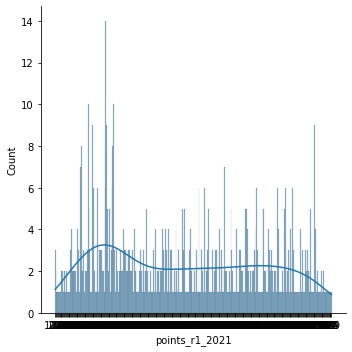

In [66]:
sns.displot(ac3['points_r1_2021'], kde=True)

In [68]:
ac3.dropna()


,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,347
MH103,Music,,,
MH116,Community and Youth Work (Full-Time),,,
CR125,Popular Music at CIT Cork School of Music,1028,1088,972
GA887,History and Geography,201,244,228
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807,808,816
LC502,Game Art and Design (portfolio),841,852,838
CR121,Music at CIT Cork School of Music,904,868,633


In [73]:
ac3.dtypes
#object means strings

title             object
points_r1_2021    object
points_r1_2020    object
points_r1_2019    object
dtype: object

In [75]:
ac3= ac3.astype({'points_r1_2021': np.float64,'points_r1_2020': np.float64, 'points_r1_2019': np.float64}, errors='ignore')

In [76]:
ac3.dtypes

title             object
points_r1_2021    object
points_r1_2020    object
points_r1_2019    object
dtype: object